In [1]:
import awkward as ak
import os
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema
import warnings
import matplotlib.pyplot as plt
import numpy as np

In [2]:
warnings.filterwarnings("ignore", "Found duplicate branch")
warnings.filterwarnings("ignore", "Missing cross-reference index for")
warnings.filterwarnings("ignore", "dcut")
warnings.filterwarnings("ignore", "Please ensure")
warnings.filterwarnings("ignore", "invalid value")

In [3]:
# path = '/project01/ndcms/cmoore24/samples/qcd/3200toInf'
# files = os.listdir(path)
# events = NanoEventsFactory.from_root(
#     {f'{path}/{files[0]}':'/Events'},
#     schemaclass=PFNanoAODSchema,
#     delayed=True,
#     metadata={'dataset':'3200toInf'},
# ).events()

In [4]:
# partons = np.unique(
#     abs(
#         qcd['qcd_3200toInf'].GenJetAK8[qcd['qcd_3200toInf'].goodjets.genJetAK8Idx][:,2].partonFlavour
#     ), 
#     return_counts=True)

In [5]:
hgg = ak.from_parquet('/project01/ndcms/cmoore24/skims/gluon_finding/mc/hgg/*')

In [6]:
bar_counts = np.unique(ak.num(hgg.goodjets), return_counts=True)

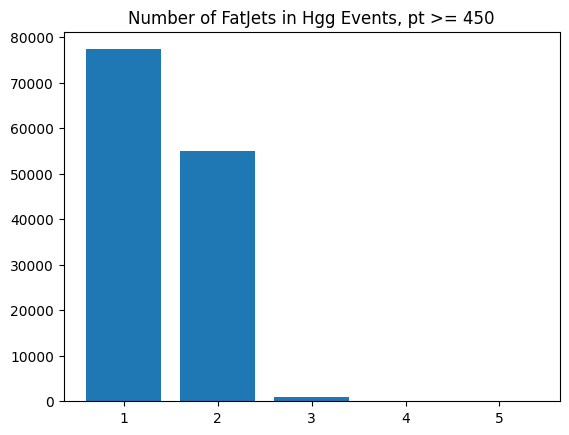

In [7]:
plt.bar(x=bar_counts[0], height=bar_counts[1])
plt.title('Number of FatJets in Hgg Events, pt >= 450')
plt.show()

In [8]:
recut = np.unique(ak.num(hgg.goodjets[ak.num(hgg.goodjets) > 2]), return_counts=True)

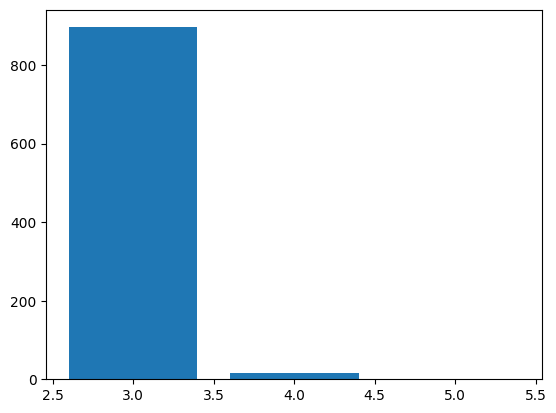

In [9]:
plt.bar(x=recut[0], height=recut[1])
plt.show()

In [10]:
higgs = np.unique(
    ak.firsts(
        hgg[ak.firsts(hgg.goodjets.btag_count == 0)].goodjets.gen_mask), 
    return_counts=True)

In [11]:
higgs2 = ak.Array([[0, 1], [int(higgs[1][0]), int(higgs[1][1])]])

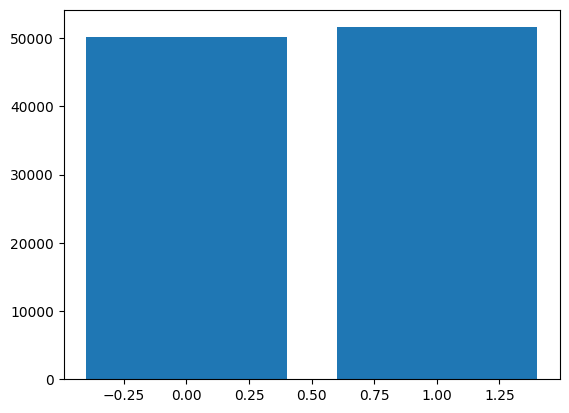

In [12]:
plt.bar(x=higgs2[0], height=higgs2[1])
plt.show()

In [68]:


        selected_hgg = ((hgg.goodjets.pt >= 450)
                    & (hgg.goodjets.pt <= 1200)
                    & (abs(hgg.goodjets.eta) <= 1.4)
                    & (hgg.goodjets.msoftdrop <= 200)
                    & (hgg.goodjets.msoftdrop >= 40)
                    & (hgg.goodjets.btag_count == 0)
                    & (hgg.goodjets.trigger_mask)
                    & (ak.num(hgg.goodjets) < 3)
                )



In [69]:
cut_goodjets = hgg.goodjets[selected_hgg]
mask = ~ak.is_none(ak.firsts(cut_goodjets))
cut_hgg = hgg[mask]

In [70]:
higgs = np.unique(
    ak.firsts(
        cut_hgg.goodjets.gen_mask), 
    return_counts=True)

In [71]:
higgs2 = ak.Array([[0, 1], [int(higgs[1][0]), int(higgs[1][1])]])

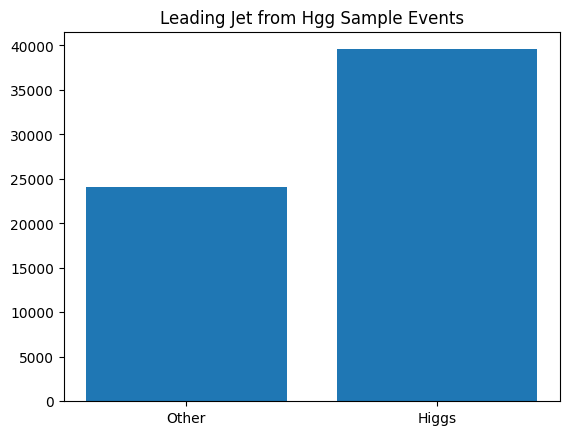

In [72]:
plt.bar(x=['Other', 'Higgs'], height=higgs2[1])
plt.title('Leading Jet from Hgg Sample Events')
plt.show()

In [73]:
higgs[1][1] / sum(higgs[1])

0.6214874734940705

In [74]:
higgs[1][1]

39567

In [75]:
test_goodjets = cut_hgg.goodjets[cut_hgg.goodjets.gen_mask]
cut_hgg['test_goodjets'] = test_goodjets
mask = ~ak.is_none(ak.firsts(test_goodjets))
test_hgg = cut_hgg[mask]

In [76]:
tester_goodjets = cut_hgg.goodjets[~cut_hgg.goodjets.gen_mask]
cut_hgg['tester_goodjets'] = tester_goodjets
mask = ~ak.is_none(ak.firsts(tester_goodjets))
tester_hgg = cut_hgg[mask]

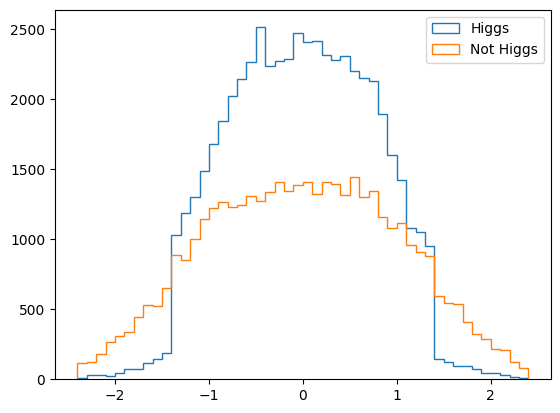

In [78]:
plt.hist(ak.firsts(test_hgg.test_goodjets.eta), bins=48, histtype='step', label='Higgs', range=(-2.4,2.4))
plt.hist(ak.firsts(tester_hgg.tester_goodjets.eta), bins=48, histtype='step', label='Not Higgs', range=(-2.4,2.4))
plt.legend()
plt.show()